In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from sklearn.linear_model import LogisticRegression
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from IPython.display import Image  
import graphviz
from eli5.sklearn import PermutationImportance

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

data=pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#data.shape
#data.columns
# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7480482611781405
RandomForest Accuracy is  0.7480482611781405
Logistic regression_Accuracy is 0.7480482611781405
Decision_tree 0.7764371894960965


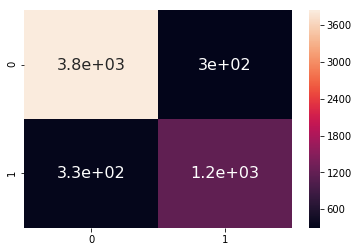

[[3841  296]
 [ 327 1170]]


In [2]:
columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       ]




one=OneHotEncoder(n_values=[2,2,2,2,2,3,3,3,3,3,3,3,3,3,2])
#transform=one.fit_transform(data[columns])
data[columns].values[0]

one_hot_encoded_training=pd.get_dummies(data[columns])

label_encode=LabelEncoder()
encode=label_encode.fit_transform(data['Churn'])
data['Churn']=encode

Target=data['Churn']

clf=RandomForestClassifier(n_estimators=600)
Logistic=LogisticRegression()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
grid_Random=GridSearchCV(clf,parameters)
Decision_tree=DecisionTreeClassifier(criterion='entropy',min_samples_split=50)

Xtrain,Xtest,Ytrain,Ytest=train_test_split(one_hot_encoded_training,Target,test_size=0.2)

clf.fit(Xtrain,Ytrain)
Logistic.fit(Xtrain,Ytrain)
Decision_tree.fit(Xtrain,Ytrain)

prediction_Random=clf.predict(Xtest)
logistic_pred=clf.predict(Xtest)
decision_pred=Decision_tree.predict(Xtest)

logistic_accuracy=accuracy_score(Ytest,logistic_pred)
accuracy=accuracy_score(Ytest,prediction_Random)
Decision_accuracy=accuracy_score(Ytest,decision_pred)
#Accuracy formula : TF+TN/TP+FP+TN+FN
print(accuracy)

print("RandomForest Accuracy is  {}".format(accuracy))
print("Logistic regression_Accuracy is {}".format(logistic_accuracy))
print("Decision_tree {}".format(Decision_accuracy))

#binarizer = preprocessing.Binarizer().fit(data['PhoneService'])
#one_hot_encoded_training.head(12)


#Confusion Matrix:
random_pred=clf.predict(Xtrain)
conf=confusion_matrix(y_true=Ytrain,y_pred=random_pred)

#perm=PermutationImportance(random_pred,random_state=1).fit(Xtrain,Ytrain)


sns.heatmap(conf,annot=True,annot_kws={"size":16})
plt.show()
print(conf)






In [3]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision=precision_score(y_true=Ytrain,y_pred=random_pred)
print("Precision score is {}".format(precision*100))
recall=recall_score(y_true=Ytrain,y_pred=random_pred)
print("Recall score is {}".format(recall*100))




Precision score is 79.80900409276944
Recall score is 78.15631262525051


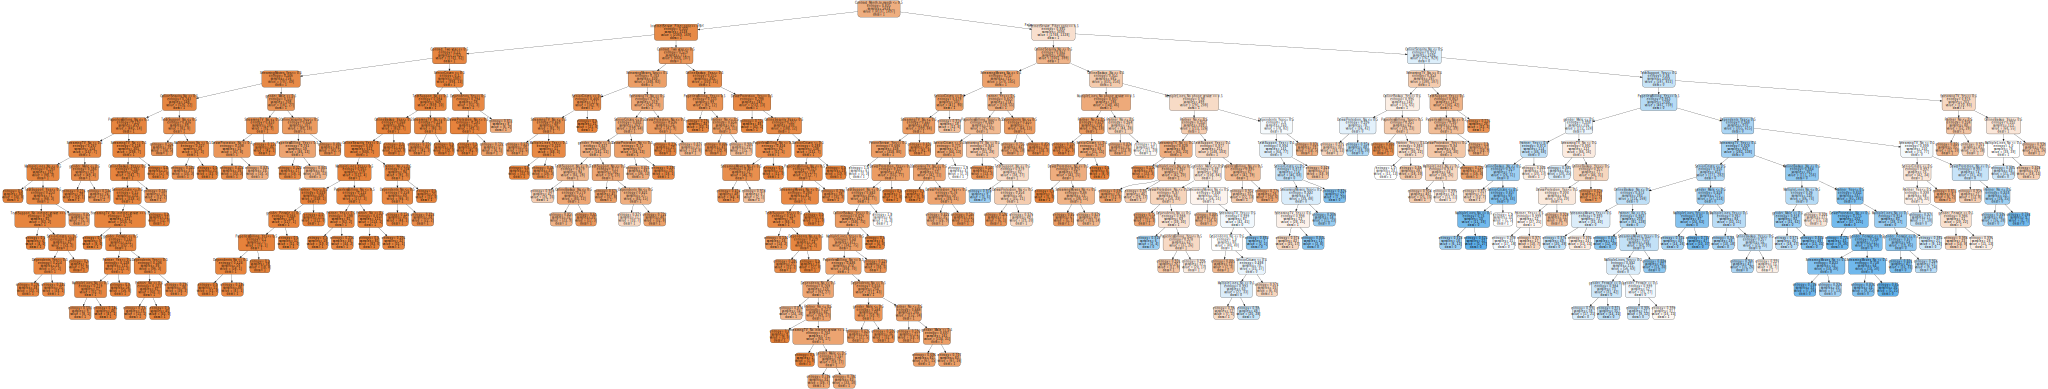

In [4]:

#Visualization of Decision Tree Classifier


Features=one_hot_encoded_training.columns
Target=['1','0']
data1=tree.export_graphviz(Decision_tree,class_names=Target,feature_names=Features,filled=True,rounded=True)
graphviz.Source(data1)


In [5]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


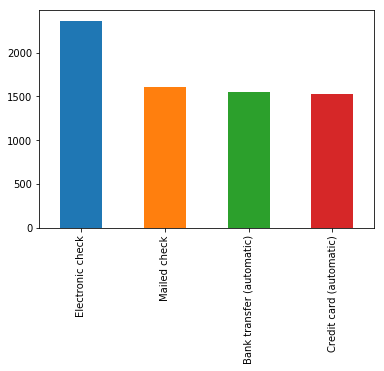

In [6]:
data['PaymentMethod'].value_counts().plot.bar()

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import sparse_encode

In [8]:


Feature_Importance=pd.DataFrame({'feature':one_hot_encoded_training.columns,'Importance':clf.feature_importances_})
Feature_Importance


,feature,Importance
0,SeniorCitizen,0.059865
1,gender_Female,0.034873
2,gender_Male,0.035358
3,Partner_No,0.028797
4,Partner_Yes,0.028476
5,Dependents_No,0.024280
6,Dependents_Yes,0.023559
7,PhoneService_No,0.005834
8,PhoneService_Yes,0.005906
9,MultipleLines_No,0.030336


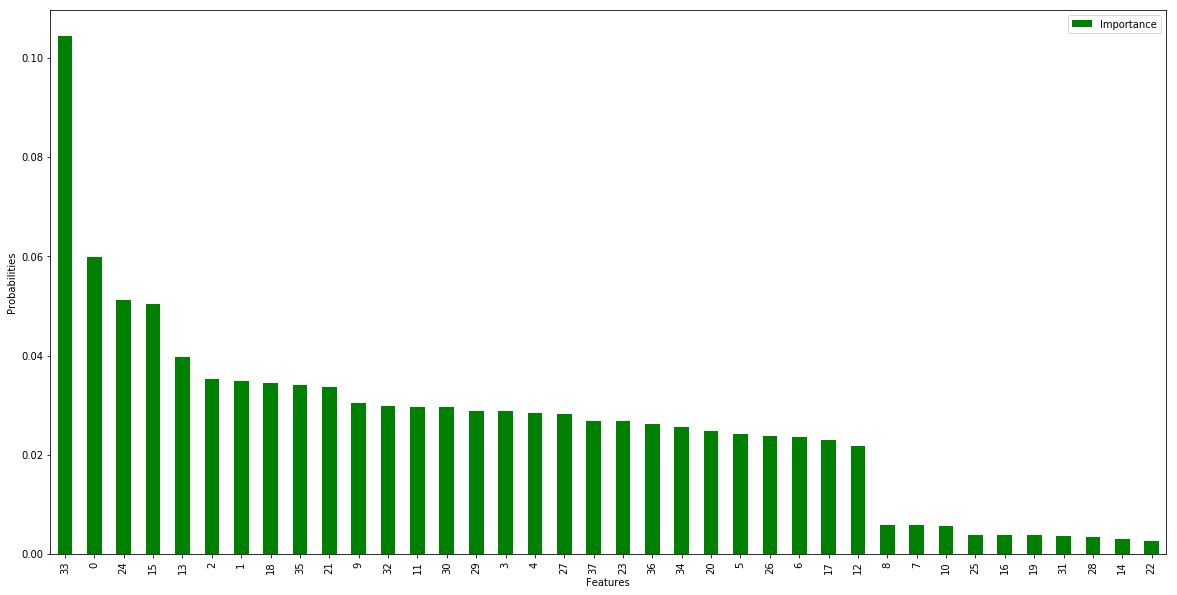

In [9]:
Feature_Importance.min()
Feature_Importance=Feature_Importance.sort_values(by='Importance',ascending=False)
plt.rcParams['figure.figsize']=(20,10)
Feature_Importance.plot.bar(color='green')
plt.xlabel("Features")
plt.ylabel("Probabilities")
plt.show()



In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [ ]:
data.dtypes


In [12]:
for i,v in enumerate(zip(data.iloc[488])):
    if i==19:
        data.iloc[488][19]=0
        
        

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
data['TotalCharges']=data.TotalCharges.str.strip()

In [16]:
data['TotalCharges']=pd.to_numeric(data.TotalCharges)

In [17]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [18]:
Total_Charges_By_customer=data.groupby(by='customerID')['TotalCharges'].sum()

Removing the customer : 4472-LVYGI since the Total charges count is invalid 

In [19]:

Total_Charges_By_customer.drop([data.iloc[488][0]])

customerID
0002-ORFBO     593.30
0003-MKNFE     542.40
0004-TLHLJ     280.85
0011-IGKFF    1237.85
0013-EXCHZ     267.40
0013-MHZWF     571.45
0013-SMEOE    7904.25
0014-BMAQU    5377.80
0015-UOCOJ     340.35
0016-QLJIS    5957.90
0017-DINOC    2460.55
0017-IUDMW    8456.75
0018-NYROU     351.50
0019-EFAEP    7261.25
0019-GFNTW    2560.10
0020-INWCK    6849.40
0020-JDNXP    1993.20
0021-IKXGC      72.10
0022-TCJCI    2791.50
0023-HGHWL      25.10
0023-UYUPN    1306.30
0023-XUOPT    1215.60
0027-KWYKW    1849.95
0030-FNXPP      57.20
0031-PVLZI      76.35
0032-PGELS      30.50
0036-IHMOT    5656.75
0040-HALCW    1090.60
0042-JVWOJ     471.85
0042-RLHYP    1396.90
               ...   
9948-YPTDG    3013.05
9950-MTGYX     487.95
9953-ZMKSM    1559.30
9955-QOPOY    4263.40
9957-YODKZ     457.10
9958-MEKUC    7517.70
9959-WOFKT    7382.25
9961-JBNMK    2030.30
9962-BFPDU      20.05
9964-WBQDJ    1725.40
9965-YOKZB     790.15
9967-ATRFS     367.55
9968-FFVVH    4111.35
9970-QBCDA     129.55

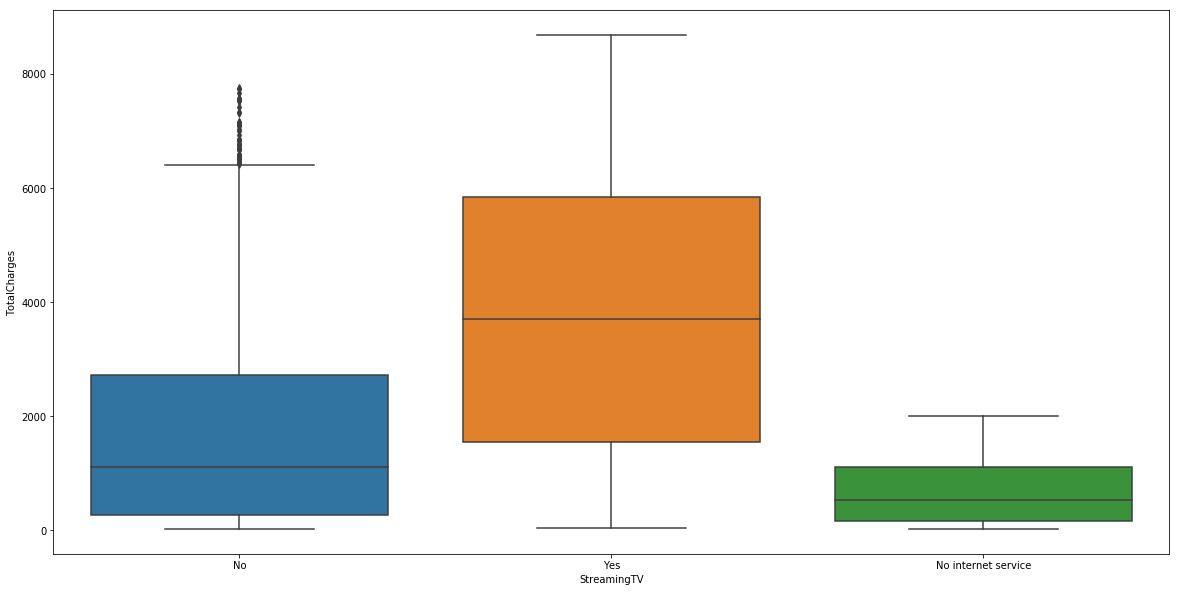

In [21]:
sns.boxplot(x='StreamingTV',y='TotalCharges',data=data)

In [22]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

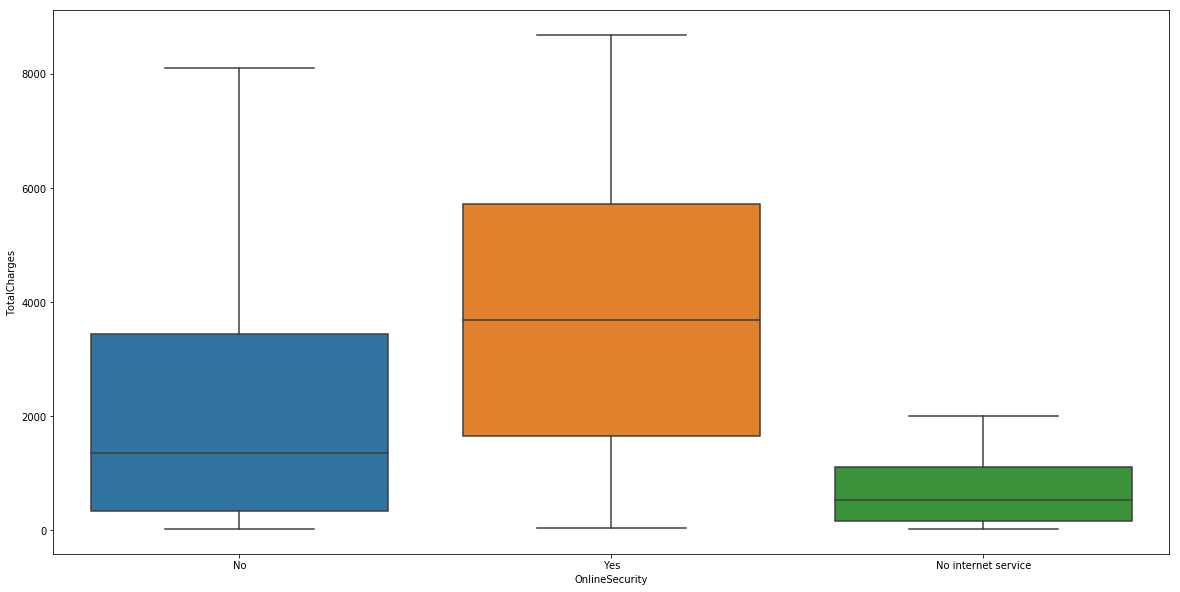

In [24]:
sns.boxplot(x='OnlineSecurity',y='TotalCharges',data=data)